In [ ]:
#Animating cumulative values over time
#1Create a data set 

In [ ]:
import pandas as pd

questions_per_library = pd.read_csv('stackoverflow.csv', parse_dates=True, index_col='creation_date'
).loc[:,'pandas':'bokeh'].resample('1M').sum().cumsum().reindex(
    pd.date_range('2008-08', '2021-10', freq='M')
).fillna(0)
questions_per_library.tail()

,pandas,matplotlib,numpy,seaborn,geopandas,geoviews,altair,yellowbrick,vega,holoviews,hvplot,bokeh
2021-05-31,200734.0,57853.0,89812.0,6855.0,1456.0,57.0,716.0,46.0,532.0,513.0,84.0,4270.0
2021-06-30,205065.0,58602.0,91026.0,7021.0,1522.0,57.0,760.0,48.0,557.0,521.0,88.0,4308.0
2021-07-31,209235.0,59428.0,92254.0,7174.0,1579.0,62.0,781.0,50.0,572.0,528.0,89.0,4341.0
2021-08-31,213410.0,60250.0,93349.0,7344.0,1631.0,62.0,797.0,52.0,589.0,541.0,92.0,4372.0
2021-09-30,214919.0,60554.0,93797.0,7414.0,1652.0,63.0,804.0,54.0,598.0,542.0,92.0,4386.0


In [ ]:
#2 Import the FuncAnimation class

In [ ]:
from matplotlib.animation import FuncAnimation

In [ ]:
#3Write a function

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import ticker
def bar_plot(data):
  fig, ax = plt.subplots(figsize=(8, 6))
  sort_order = data.last('1M').squeeze().sort_values().index
  bars = [
      bar.set_label(label) for label, bar in
      zip(sort_order, ax.barh(sort_order, [0] * data.shape[1]))
  ]

  ax.set_xlabel('total questions', fontweight='bold')
  ax.set_xlim(0,250_000)
  ax.xaxis.set_major_formatter(ticker.EngFormatter())
  ax.xaxis.set_tick_params(labelsize=12)
  ax.yaxis.set_tick_params(labelsize=12)

  for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

  fig.tight_layout()
  return fig, ax

(<Figure size 800x600 with 1 Axes>, <Axes: xlabel='total questions'>)

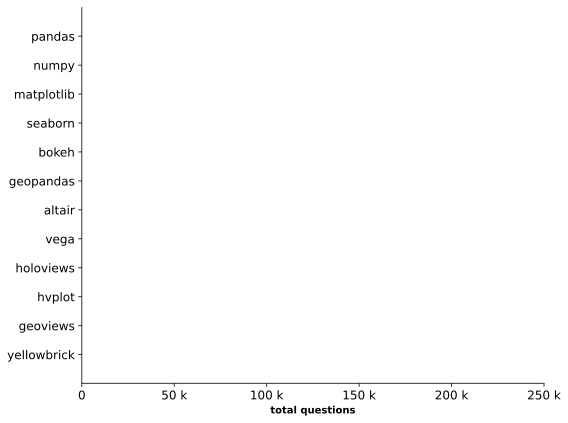

In [ ]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
bar_plot(questions_per_library)

In [ ]:
#4

In [ ]:
#from pandas.compat.pyarrow import annotations
def generate_plot_text(ax):
  annotations = [
      ax.annotate(
      '', xy=(0, bar.get_y() + bar.get_height()/2),
      ha='left', va='center'
  )for bar in ax.patches
  ]
  time_text = ax.text(
      0.9, 0.1, '', transform=ax.transAxes,
      fontsize=15, ha='center', va='center'
  )
  return annotations, time_text

In [ ]:
#5

In [ ]:
def update(frame, *, ax, df, annotations, time_text):
  data = df.loc[frame,:]
  
  #updte bars
  for rect, text in zip(ax.patches, annotations):
    col = rect.get_label()
    if data[col]:
      rect.set_width(data[col])
      text.set_x(data[col])
      text.set_text(f'{data[col]:,.0f}')

  #update time
  time_text.set_text(frame.strftime('%b\n%Y'))


In [ ]:
#6

In [ ]:
from pandas.core.strings.base import annotations
from functools import partial

def bar_plot_init(questions_per_library):
  fig, ax = bar_plot(questions_per_library)
  annotations, time_text = generate_plot_text(ax)

  bar_plot_update = partial(
      update, ax=ax, df=questions_per_library,
      annotations=annotations, time_text=time_text
  )
  return fig, bar_plot_update


In [ ]:
#7

In [ ]:
fig, update_func = bar_plot_init(questions_per_library)

ani= FuncAnimation(
    fig, update_func, frames=questions_per_library.index, repeat=False
)
ani.save(
    '../media/stackoverflow_question.mp4',
    writer='ffmpeg', fps=10, bitrate=100, dpi=300
)
plt.close()

In [ ]:
from IPython import display

display.Video(
    '../media/stackoverflow_questions.mp4', width=600, height=400,
    embed=True, html_attributes='controls muted autoplay'
)

In [ ]:
#Animatinf distribution over time
#1

In [5]:
import pandas as pd

subway = pd.read_csv(
    'NYC_subway_daily.csv', parse_dates=['Datetime'],
    index_col=['Borough', 'Datetime']
)
subway_daily = subway.unstack(0)
subway_daily.head

<bound method NDFrame.head of               Entries                                    Exits            \
Borough            Bk        Bx          M         Q        Bk        Bx   
Datetime                                                                   
2017-02-04   617650.0  247539.0  1390496.0  408736.0  417449.0  148237.0   
2017-02-05   542667.0  199078.0  1232537.0  339716.0  405607.0  139856.0   
2017-02-06  1184916.0  472846.0  2774016.0  787206.0  761166.0  267991.0   
2017-02-07  1192638.0  470573.0  2892462.0  790557.0  763653.0  270007.0   
2017-02-08  1243658.0  497412.0  2998897.0  825679.0  788356.0  275695.0   
...               ...       ...        ...       ...       ...       ...   
2021-08-09   416964.0  176407.0   836603.0  316604.0  438273.0  168791.0   
2021-08-10   439452.0  178417.0   889912.0  330299.0  462818.0  174888.0   
2021-08-11   442855.0  183132.0   899173.0  331304.0  464905.0  175388.0   
2021-08-12   438576.0  178191.0   884371.0  327306.0  4633

In [6]:
manhattan_entries = subway_daily['Entries']['M']

In [ ]:
#2

In [7]:
import numpy as np
count_per_bin, bin_ranges = np.histogram(manhattan_entries, bins=30)

In [ ]:
#3

In [13]:
def subway_histogram(data, bins, date_range):
  _, bin_ranges = np.histogram(data, bins=bins)

  weekday_mask = data.index.weekday < 5
  condigs = [
      {'label' : 'weekend', 'mask': ~weekday_mask, 'ymax': 60},
      {'label' : 'weekend', 'mask': weekday_mask, 'ymax': 120}
  ]

  fig, axes = plt.subplots(1,2, figsize=(8,4), sharex=True)
  for ax, config in zip(axes, config):
    _,_, config['hist'] = ax.hist(
        data[config['mask']].loc[date_range], bin_ranges, ec='black'
    )
    ax.xaxis.set_major_fotmatter(ticker.EngFormatter())
    ax.set(
        xlim=(0, None), ylim=(0, config['ymax']),
        xlabel=f'{config["label"]} Entires'
    )
    for spine in ['top', 'right']:
      ax.spines[spine].set_visible(False)
  axes[0].set_ylabel('Frequency')
  fig.suptitle('Histogram of Daily Subway Entries in Manhattan')
  fig.tight_layout()

  return fig, axes, bin_ranges, configs

In [14]:
_= subway_histogram(manhattan_entries, bins=30, date_range='2017')

NameError: ignored

In [15]:
def add_time_text(ax):
  time_text = ax.text(
      0.15, 0.9, '', transform=ax.transAxes,
      fontsize=15, ha='center', va='center'
  )
  return time_text

In [16]:
def update(frame, *, data, configs, time_text, bin_ranges):
  artists = []

  time = frame.strftime('%b\n%Y')
  if time != time_text.get_text():
    time_text.set_text(time)
    artists.append(time_text)

  for config in configs:
    time_frame_mask = \
    (data.index > frame - pd.Timedelta(days=365)) & (data.index <= frame)
    counts, _ = np.histogram(
        data(time_frame_mask & config('mask')),
        bin_ranges
    )
    for count, rect in zip(counts, config('hist').patches):
      if count != rect.get_height():
        rect.set_height(count)
        artists.append(rect)
        return artists

In [18]:
def histogram_init(data, bins, initial_date_range):
  fig, axes, bin_ranges, configs = subway_histogram(data, bins, initial_date_range)

  update_func = partial(
      update, data=data, configs=configs,
      time_text=add_time_text(axes[0]),
      bin_ranges=bin_ranges
  )
  return fig, update_func

In [20]:
fig, update_func = histogram_init(
    manhattan_entries, bins=30, initial_date_range=slice('2017', '2019-07')
)
ani = FunAnimation(
    fig, update_func, frames=manhattan_entries['2019-08' : '2021'].index,
    repeat=False, blit=True
)
ani.save(
    '../media.subway_entries_subplots.mp4',
    writer='ffmpeq', fps=30, bitrate=500, dpi=300
)
plt.close()

NameError: ignored